# Data augmentation


# SMOTE ENN

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("32features_1hour_shifted_dataset3.csv")

# Columns to drop
cols_to_drop = ['mastitis', 'other_disease', 'lameness', 'calving']

# Drop the columns
df = df.drop(columns=cols_to_drop)

# Optional: Save the cleaned dataframe
df.to_csv("cleaned_dataset3.csv", index=False)

# Display first few rows to verify
print(df.head())



    cow           start_time             end_time  duration_hours  Minimum  \
0  1565  2013-10-01 01:00:00  2013-10-02 00:00:00              24   -828.0   
1  1565  2013-10-01 02:00:00  2013-10-02 01:00:00              24   -828.0   
2  1565  2013-10-01 03:00:00  2013-10-02 02:00:00              24   -828.0   
3  1565  2013-10-01 04:00:00  2013-10-02 03:00:00              24   -828.0   
4  1565  2013-10-01 05:00:00  2013-10-02 04:00:00              24   -828.0   

      Maximum        Mean         RMS         STD   MeanSTD6h  ...  Autocorr8  \
0  1412.17404 -193.869860  734.876162  708.842332  598.714610  ...  -0.008341   
1  1412.17404 -207.241797  744.775351  715.360861  683.752773  ...   0.009336   
2  1412.17404 -203.343851  740.675355  712.215739  622.535687  ...   0.207801   
3  1412.17404 -211.843095  748.914922  718.328659  564.865303  ...   0.108442   
4  1412.17404 -200.540485  757.752157  730.733771  654.851242  ...   0.159073   

   Autocorr9  Autocorr10  Autocorr11        

In [ ]:
print("Nombre de valeurs manquantes par colonne :")
print(df.isna().sum())


Nombre de valeurs manquantes par colonne :
cow                0
start_time         0
end_time           0
duration_hours     0
Minimum            0
Maximum            0
Mean               0
RMS                0
STD                0
MeanSTD6h         40
STDMean6h         40
STDSD              0
RMSSD              0
Mode               0
Q10                0
Q90                0
Q25                0
Q50                0
Q75                0
Skewness           0
Kurtosis           0
Autocorr1          0
Autocorr2          0
Autocorr3          0
Autocorr4          0
Autocorr5          0
Autocorr6          0
Autocorr7          0
Autocorr8          0
Autocorr9          0
Autocorr10         0
Autocorr11         0
h1                 0
h2                 0
h3                 0
h4                 0
oestrus            0
OK                 0
dtype: int64


There are missing values. SMOTE cannot work in the presence of such values, so we have two options: either we drop them or we impute them, for example, using the mean value.


code with imputing

In [ ]:
# import pandas as pd
# from imblearn.combine import SMOTEENN
# from sklearn.impute import SimpleImputer
# from collections import Counter

# # Liste des colonnes cibles à traiter
# target_columns = ['OK', 'oestrus', 'lameness', 'mastitis', 'other_disease']

# # Sélection des features numériques
# X_full = df.drop(columns=target_columns)
# X_full = X_full.select_dtypes(include=['int64', 'float64'])

# # Imputation des NaNs
# imputer = SimpleImputer(strategy='mean')
# X_full_imputed = pd.DataFrame(imputer.fit_transform(X_full), columns=X_full.columns)

# # Initialiser une liste pour stocker tous les échantillons équilibrés
# all_balanced_samples = []

# for target in target_columns:
#     print(f"\nTraitement de la cible : {target}")
#     y = df[target]
#     y = y.loc[X_full_imputed.index]

#     print("Avant SMOTE-ENN :", Counter(y))

#     smote_enn = SMOTEENN(random_state=42)
#     X_res, y_res = smote_enn.fit_resample(X_full_imputed, y)

#     print("Après SMOTE-ENN :", Counter(y_res))

#     # Construire le DataFrame avec une colonne indiquant la cible traitée
#     X_res_df = pd.DataFrame(X_res, columns=X_full.columns)
#     y_res_df = pd.Series(y_res, name=target)

#     # Ajouter la cible en colonne + les autres cibles à 0
#     other_targets = {col: 0 for col in target_columns if col != target}
#     for col, val in other_targets.items():
#         X_res_df[col] = val

#     # Ajouter la cible actuelle
#     X_res_df[target] = y_res_df

#     # Ajouter à la liste globale
#     all_balanced_samples.append(X_res_df)

# # Concaténer tous les échantillons équilibrés
# final_df = pd.concat(all_balanced_samples, ignore_index=True)

# # Sauvegarder dans un seul fichier CSV
# final_df.to_csv("balanced_dataset_all.csv", index=False)
# print(" Tous les échantillons synthétiques sauvegardés dans 'balanced_dataset_all.csv'")



Traitement de la cible : OK
Avant SMOTE-ENN : Counter({1: 36259, 0: 3495})
Après SMOTE-ENN : Counter({0: 36083, 1: 34231})

Traitement de la cible : oestrus
Avant SMOTE-ENN : Counter({0: 39183, 1: 571})
Après SMOTE-ENN : Counter({1: 39179, 0: 38502})

Traitement de la cible : lameness
Avant SMOTE-ENN : Counter({0: 38002, 1: 1752})
Après SMOTE-ENN : Counter({1: 37945, 0: 36835})

Traitement de la cible : mastitis
Avant SMOTE-ENN : Counter({0: 39438, 1: 316})
Après SMOTE-ENN : Counter({1: 39438, 0: 39328})

Traitement de la cible : other_disease
Avant SMOTE-ENN : Counter({0: 38898, 1: 856})
Après SMOTE-ENN : Counter({1: 38893, 0: 38271})
✅ Tous les échantillons synthétiques sauvegardés dans 'balanced_dataset_all.csv'


code with dropping

In [ ]:
import pandas as pd
from imblearn.combine import SMOTEENN
from collections import Counter

# Liste des colonnes cibles à traiter
target_columns = ['OK', 'oestrus']

# Supprimer les lignes contenant des NaN dans les features et les cibles
df_cleaned = df.dropna(subset=target_columns).copy()
X_full = df_cleaned.drop(columns=target_columns)
X_full = X_full.select_dtypes(include=['int64', 'float64'])
df_cleaned = df_cleaned[X_full.columns.tolist() + target_columns]
df_cleaned = df_cleaned.dropna()  # Supprime les NaN résiduels dans X

# Liste pour stocker les DataFrames équilibrés
all_balanced_samples = []

for target in target_columns:
    print(f"\nTraitement de la cible : {target}")
    y = df_cleaned[target]
    X = df_cleaned.drop(columns=target_columns)

    print("Avant SMOTE-ENN :", Counter(y))

    smote_enn = SMOTEENN(random_state=42)
    X_res, y_res = smote_enn.fit_resample(X, y)

    print("Après SMOTE-ENN :", Counter(y_res))

    # Crée le DataFrame résultant
    X_res_df = pd.DataFrame(X_res, columns=X.columns)
    y_res_df = pd.Series(y_res, name=target)

    # Ajouter les autres cibles à 0
    for col in target_columns:
        if col != target:
            X_res_df[col] = 0
    X_res_df[target] = y_res_df

    # Ajout à la liste globale
    all_balanced_samples.append(X_res_df)

# Fusionner tous les échantillons dans un seul DataFrame
final_df = pd.concat(all_balanced_samples, ignore_index=True)

# Sauvegarder dans un seul fichier CSV
final_df.to_csv("balanced_dataset_all.csv", index=False)
print("✅ Tous les échantillons équilibrés sauvegardés dans 'balanced_dataset_all.csv'")



Traitement de la cible : OK
Avant SMOTE-ENN : Counter({1: 22997, 0: 2468})
Après SMOTE-ENN : Counter({0: 22882, 1: 21177})

Traitement de la cible : oestrus
Avant SMOTE-ENN : Counter({0: 22997, 1: 2468})
Après SMOTE-ENN : Counter({1: 22882, 0: 21177})
✅ Tous les échantillons équilibrés sauvegardés dans 'balanced_dataset_all.csv'


**Feature** **Selection**

## Étape 1 : Entraîner un modèle XGBoost avec toutes les features

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

final_df = pd.read_csv('balanced_dataset3.csv')
feature_cols = [
    'Minimum', 'Maximum', 'Mean', 'RMS', 'STD', 'MeanSTD6h', 'STDMean6h', 'STDSD',
    'RMSSD', 'Mode', 'Q10', 'Q90', 'Q25', 'Q50', 'Q75',
    'Skewness', 'Kurtosis'
] + [f'Autocorr{i}' for i in range(1, 12)] + [f'h{i}' for i in range(1, 5)]

In [ ]:

# Features et labels
X = final_df[feature_cols]
label = ['oestrus','OK']
y = final_df[label]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle multilabel via MultiOutputClassifier
base_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
multi_model = MultiOutputClassifier(base_model)
multi_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:41:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:41:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

## Étape 2 : Calculer les SHAP values

Traitement de la condition: oestrus
Traitement de la condition: OK


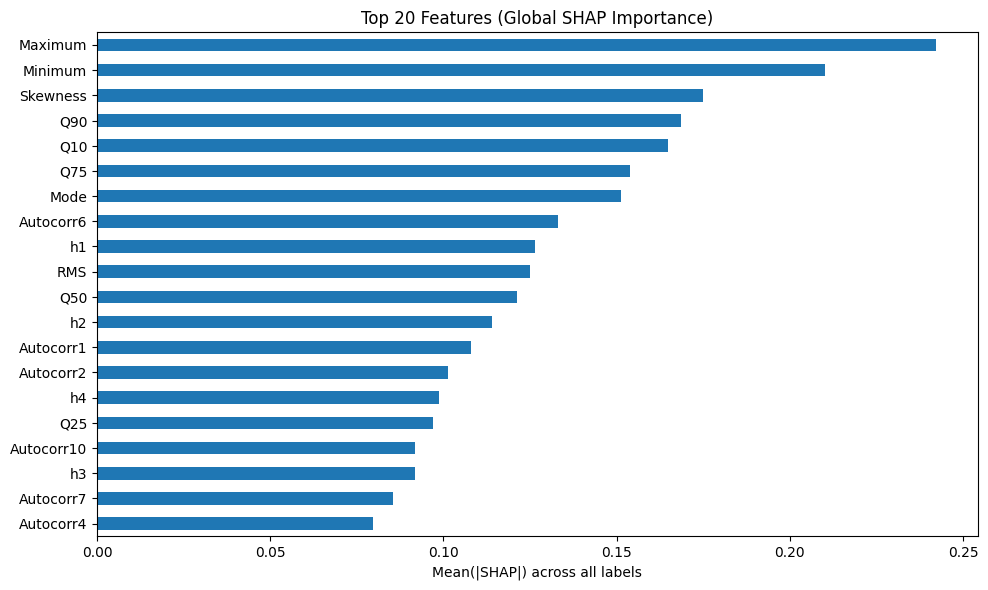

,oestrus,OK,mean_global
Maximum,0.235508,0.248700,0.242104
Minimum,0.174340,0.246270,0.210305
Skewness,0.152631,0.197169,0.174900
Q90,0.200948,0.136089,0.168519
Q10,0.181249,0.148366,0.164808
Q75,0.164418,0.143272,0.153845
Mode,0.163099,0.139304,0.151201
Autocorr6,0.138636,0.127707,0.133172
h1,0.139374,0.113507,0.126441
RMS,0.158570,0.091391,0.124981


In [ ]:
import shap
import numpy as np

# Stockage des SHAP moyens pour chaque feature par label
shap_matrix = pd.DataFrame(index=X_test.columns)

# Boucle sur chaque label
for i, target in enumerate(label):
    print(f"Traitement de la condition: {target}")

    single_model = multi_model.estimators_[i]
    explainer = shap.Explainer(single_model)
    shap_values = explainer(X_test)

    mean_shap = np.abs(shap_values.values).mean(axis=0)

    # Ajouter les valeurs dans la matrice
    shap_matrix[target] = mean_shap

# Moyenne globale des SHAP values par feature
shap_matrix['mean_global'] = shap_matrix.mean(axis=1)

# Tri des features par importance globale
shap_ranked = shap_matrix.sort_values('mean_global', ascending=False)

# Affichage du top 20
top_features = shap_ranked.head(20)

# Visualisation
plt.figure(figsize=(10, 6))
top_features['mean_global'].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Features (Global SHAP Importance)")
plt.xlabel("Mean(|SHAP|) across all labels")
plt.tight_layout()
plt.show()

display(top_features)


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier

import numpy as np
import pandas as pd

# Train-test split (refait pour clarté)
X = final_df[feature_cols]
y = final_df[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 1: Entraîner le modèle initial pour obtenir les SHAP values
base_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
multi_model = MultiOutputClassifier(base_model)
multi_model.fit(X_train, y_train)

# Calcul des SHAP moyens globaux
shap_matrix = pd.DataFrame(index=X_test.columns)

for i, target in enumerate(label):
    explainer = shap.Explainer(multi_model.estimators_[i])
    shap_values = explainer(X_test)
    mean_shap = np.abs(shap_values.values).mean(axis=0)
    shap_matrix[target] = mean_shap

shap_matrix['mean_global'] = shap_matrix.mean(axis=1)

# Étape 2: Essai de plusieurs seuils pour la sélection de features
thresholds = np.arange(0.05, 0.3, 0.02)
results = []

for threshold in thresholds:
    selected_features = shap_matrix[shap_matrix['mean_global'] >= threshold].index.tolist()

    if not selected_features:
        print(f"🔴 Seuil {threshold}: aucune feature sélectionnée.")
        continue

    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    model_sel = MultiOutputClassifier(xgb.XGBClassifier(eval_metric='logloss'))
    model_sel.fit(X_train_sel, y_train)

    y_pred = model_sel.predict(X_test_sel)

    # Évaluation multilabel
    f1 = np.mean([f1_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0, average='macro') for i in range(y.shape[1])])
    precision = np.mean([precision_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0) for i in range(y.shape[1])])
    recall = np.mean([recall_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0) for i in range(y.shape[1])])

    # Gestion AUC (nécessite predict_proba et au moins deux classes présentes)
    try:
        y_prob = np.column_stack([model_sel.estimators_[i].predict_proba(X_test_sel)[:, 1] for i in range(y.shape[1])])
        auc = np.mean([roc_auc_score(y_test.iloc[:, i], y_prob[:, i]) for i in range(y.shape[1])])
    except Exception as e:
        auc = np.nan

    print(f"✅ Seuil {threshold:.3f} | {len(selected_features)} features | F1: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | AUC: {auc:.4f}")

    results.append({
        'threshold': threshold,
        'num_features': len(selected_features),
        'f1_macro': f1,
        'precision_macro': precision,
        'recall_macro': recall,
        'roc_auc_macro': auc
    })

# Résumé
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='f1_macro', ascending=False))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Seuil 0.050 | 30 features | F1: 0.4935 | Precision: 0.2442 | Recall: 0.1789 | AUC: 0.7458
✅ Seuil 0.070 | 24 features | F1: 0.5064 | Precision: 0.2677 | Recall: 0.1968 | AUC: 0.7510
✅ Seuil 0.090 | 18 features | F1: 0.5117 | Precision: 0.2785 | Recall: 0.2019 | AUC: 0.7559
✅ Seuil 0.110 | 12 features | F1: 0.5166 | Precision: 0.2939 | Recall: 0.1950 | AUC: 0.7630
✅ Seuil 0.130 | 8 features | F1: 0.5206 | Precision: 0.3145 | Recall: 0.1823 | AUC: 0.7707
✅ Seuil 0.150 | 7 features | F1: 0.5232 | Precision: 0.3260 | Recall: 0.1794 | AUC: 0.7743
✅ Seuil 0.170 | 3 features | F1: 0.4863 | Precision: 0.3086 | Recall: 0.0896 | AUC: 0.7618
✅ Seuil 0.190 | 2 features | F1: 0.4629 | Precision: 0.3194 | Recall: 0.0458 | AUC: 0.7529
✅ Seuil 0.210 | 2 features | F1: 0.4629 | Precision: 0.3194 | Recall: 0.0458 | AUC: 0.7529
✅ Seuil 0.230 | 1 features | F1: 0.4352 | Precision: 0.2134 | Recall: 0.0074 | AUC: 0.6957
🔴 Seuil 0.25000000000000006: aucune feature sélectionnée.
🔴 Seuil 0.27: aucune feature

,threshold,num_features,f1_macro,precision_macro,recall_macro,roc_auc_macro
5,0.15,7,0.523239,0.325988,0.179354,0.774325
4,0.13,8,0.520619,0.314461,0.182340,0.770736
3,0.11,12,0.516636,0.293908,0.194997,0.763049
2,0.09,18,0.511726,0.278509,0.201926,0.755868
1,0.07,24,0.506385,0.267733,0.196835,0.750967
0,0.05,30,0.493507,0.244193,0.178903,0.745784
6,0.17,3,0.486304,0.308577,0.089571,0.761766
7,0.19,2,0.462922,0.319380,0.045839,0.752892
8,0.21,2,0.462922,0.319380,0.045839,0.752892
9,0.23,1,0.435183,0.213376,0.007402,0.695750


 Optimal :Seuil 0.15 | 23 features | F1: 0.950244 | Precision: 0.963512 | Recall: 0.849105 | AUC: 0.998962

In [ ]:
threshold = 0.085
selected_features = shap_matrix[shap_matrix['mean_global'] >= threshold].index.tolist()

print(f"🎯 Seuil choisi = {threshold}")
print(f"✅ {len(selected_features)} features sélectionnées :\n{selected_features}")

🎯 Seuil choisi = 0.085
✅ 19 features sélectionnées :
['Minimum', 'Maximum', 'RMS', 'Mode', 'Q10', 'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Autocorr1', 'Autocorr2', 'Autocorr6', 'Autocorr7', 'Autocorr10', 'h1', 'h2', 'h3', 'h4']


In [ ]:
print(final_df.columns)

Index(['cow', 'duration_hours', 'Minimum', 'Maximum', 'Mean', 'RMS', 'STD',
       'MeanSTD6h', 'STDMean6h', 'STDSD', 'RMSSD', 'Mode', 'Q10', 'Q90', 'Q25',
       'Q50', 'Q75', 'Skewness', 'Kurtosis', 'Autocorr1', 'Autocorr2',
       'Autocorr3', 'Autocorr4', 'Autocorr5', 'Autocorr6', 'Autocorr7',
       'Autocorr8', 'Autocorr9', 'Autocorr10', 'Autocorr11', 'h1', 'h2', 'h3',
       'h4', 'oestrus', 'OK'],
      dtype='object')


In [ ]:
selected_features=['Minimum', 'Maximum', 'RMS', 'Mode', 'Q10', 'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Autocorr1', 'Autocorr2', 'Autocorr6', 'Autocorr5','Autocorr7', 'Autocorr10', 'h1', 'h2', 'h3', 'h4']


import pandas as pd
if selected_features:
    # Update X_train and X_test with only the selected columns
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    # Optionally, save the updated dataset to a CSV file
    final_selected_df = final_df[selected_features]
    features_columns = ['cow','duration_hours']
    label_columns = ['oestrus','OK']

    # Combine features and labels
    final_selected_df_1 = pd.concat([
        final_df[features_columns],
        final_selected_df,
        final_df[label_columns]
    ], axis=1)

    final_selected_df_1.to_csv('selected_features_after_augmentation_D3.csv', index=False)
    print("Selected features dataset saved to 'selected_features_after_augmentations.csv'.")
    print(final_selected_df_1.head())
else:
        print("No features selected for the given threshold.")

Selected features dataset saved to 'selected_features_after_augmentations.csv'.
    cow  duration_hours    Minimum    Maximum         RMS       Mode  \
0  1565              24 -822.92509  830.92542  594.904366 -822.92509   
1  1565              24 -822.92509  830.92542  608.318618 -822.92509   
2  1565              24 -822.92509  830.92542  591.364529 -822.92509   
3  1565              24 -822.92509  830.92542  591.975310 -822.92509   
4  1565              24 -822.92509  372.67570  571.103443 -822.92509   

          Q10         Q90         Q25         Q50  ...  Autocorr6  Autocorr5  \
0 -816.428704  361.034102 -762.721863 -531.389040  ...  -0.499275  -0.063774   
1 -816.428704  361.034102 -762.721863 -630.423235  ...  -0.511662  -0.122118   
2 -816.428704  361.034102 -754.051578 -531.389040  ...  -0.456789  -0.148970   
3 -816.428704  361.034102 -754.051578 -531.389040  ...  -0.352080  -0.039898   
4 -816.428704  334.127833 -754.051578 -531.389040  ...  -0.335072  -0.233848   

   Aut

In [ ]:
print(final_selected_df_1.columns)

Index(['cow', 'duration_hours', 'Minimum', 'Maximum', 'RMS', 'Mode', 'Q10',
       'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Autocorr1', 'Autocorr2',
       'Autocorr6', 'Autocorr5', 'Autocorr7', 'Autocorr10', 'h1', 'h2', 'h3',
       'h4', 'oestrus', 'OK'],
      dtype='object')


**Classification** -- **LightGBM**

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5105
[LightGBM] [Info] Number of data points in the train set: 63444, number of used features: 21
[LightGBM] [Info] Start training from score -1.433346
[LightGBM] [Info] Start training from score -0.272478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

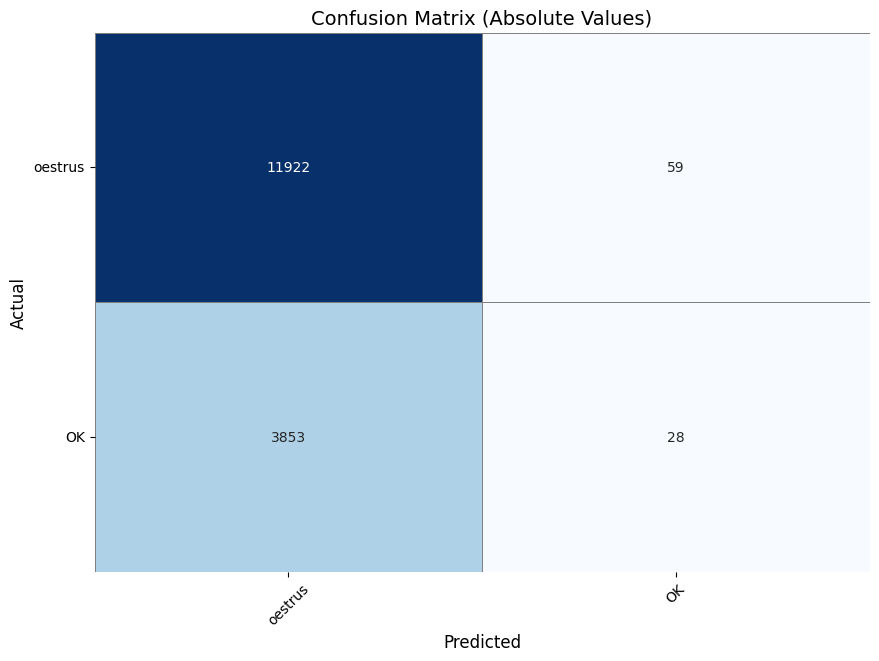


Confusion matrix (percentages):


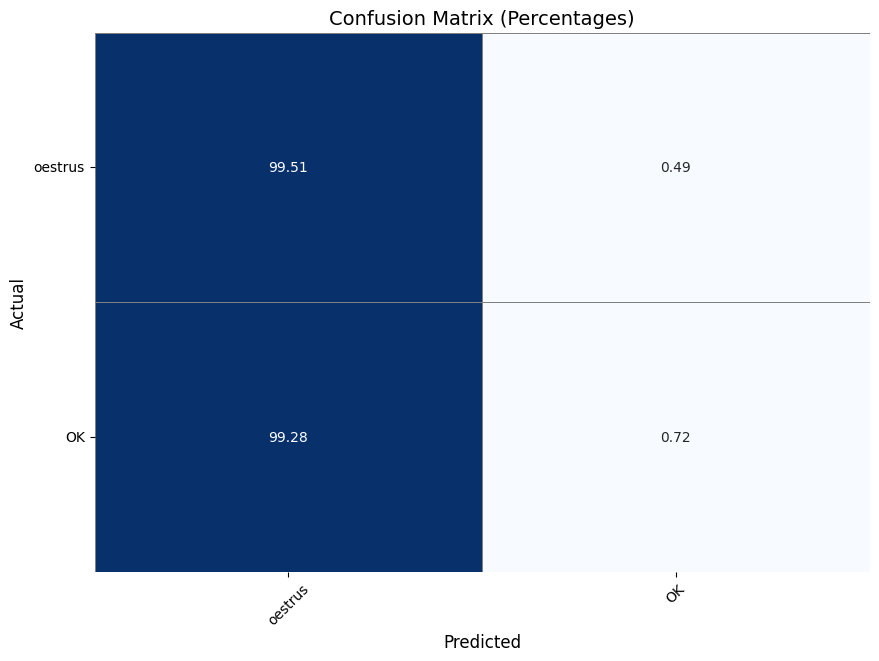


Detailed performance report by class:
+---------+-------------+------------------------+---------------+------------+-----------+
| Class   |   Precision |   Recall (Sensitivity) |   Specificity |   F1-score |   Support |
|---------+-------------+------------------------+---------------+------------+-----------|
| oestrus |      0.3218 |                 0.0072 |        0.9951 |     0.0141 |      3881 |
| OK      |      0.7558 |                 0.9951 |        0.0072 |     0.8591 |     11981 |
+---------+-------------+------------------------+---------------+------------+-----------+


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('selected_features_after_augmentation_D3.csv')

# Drop unnecessary columns if present
df.drop(columns=['start_time', 'end_time', 'cow'], errors='ignore', inplace=True)

# Split: 90% for training/validation, 10% set aside
df_train_val, df_unused = train_test_split(df, test_size=0.1, random_state=42)

# Save the 10% unused data to CSV
df_unused.to_csv("unused_balanced_dataset3.csv", index=False)

# 1. Create multi-class target
target_cols = ['oestrus', 'OK']
df_train_val['target'] = df_train_val[target_cols].idxmax(axis=1)

# 2. Encode labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(df_train_val['target'])

# 3. Split into features and labels
X = df_train_val.drop(columns=target_cols + ['target'])
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define the LightGBM model
model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(target_cols),
    metric='multi_logloss',
    random_state=42
)

# 5. Hyperparameter grid for LightGBM
# param_grid = {
#     'num_leaves': [15, 31, 63],
#     'max_depth': [3, 5, 7, -1],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [50, 100, 200],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

param_grid = {
    'num_leaves': [31, 63],
    'max_depth': [5, 7],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
# 2 x 2 x 2 x 2 x 1 x 1 = 16 combinations × 3 folds = 48 models

# {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'num_leaves': 63, 'subsample': 0.8}


# 6. Grid search for best hyperparameters
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# 7. Train the model
grid_search.fit(X_train, y_train)

# 8. Display best parameters
print("Best hyperparameters found:")
print(grid_search.best_params_)

# 9. Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Decode numerical labels for readability
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title, fmt='d'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt=fmt, cmap='Blues',
                cbar=False, linewidths=0.5, linecolor='gray')
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Confusion matrix (absolute values)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=target_cols)
conf_matrix_df = pd.DataFrame(conf_matrix,
                             index=target_cols,
                             columns=target_cols)

print("\nConfusion matrix (absolute values):")
plot_confusion_matrix(conf_matrix_df, "Confusion Matrix (Absolute Values)")

# Confusion matrix (percentages per row)
conf_matrix_percent = confusion_matrix(y_test_labels, y_pred_labels, labels=target_cols, normalize='true') * 100
conf_matrix_percent_df = pd.DataFrame(conf_matrix_percent.round(2),
                                     index=target_cols,
                                     columns=target_cols)

print("\nConfusion matrix (percentages):")
plot_confusion_matrix(conf_matrix_percent_df, "Confusion Matrix (Percentages)", fmt='.2f')

# Function to calculate specificity per class
def specificity_score(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    specificity_scores = []
    for i in range(len(labels)):
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
        fp = np.sum(np.delete(cm[i, :], i))
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_scores.append(specificity)
    return specificity_scores

# Function to compute all metrics
def calculate_metrics(y_true, y_pred, target_names):
    labels = range(len(target_names))
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    metrics = []
    for i, class_name in enumerate(target_names):
        tp = cm[i, i]
        fp = np.sum(np.delete(cm[:, i], i))
        fn = np.sum(np.delete(cm[i, :], i))
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = np.sum(y_true == i)

        metrics.append({
            'Class': class_name,
            'Precision': precision,
            'Recall (Sensitivity)': recall,
            'Specificity': specificity,
            'F1-score': f1,
            'Support': support
        })

    return pd.DataFrame(metrics)

# Compute and display metrics
metrics_df = calculate_metrics(y_test, y_pred, target_cols)

print("\nDetailed performance report by class:")
print(tabulate(metrics_df, headers='keys', tablefmt='psql',
               showindex=False, floatfmt=".4f"))



[UNUSED DATA] Confusion matrix (absolute values) :


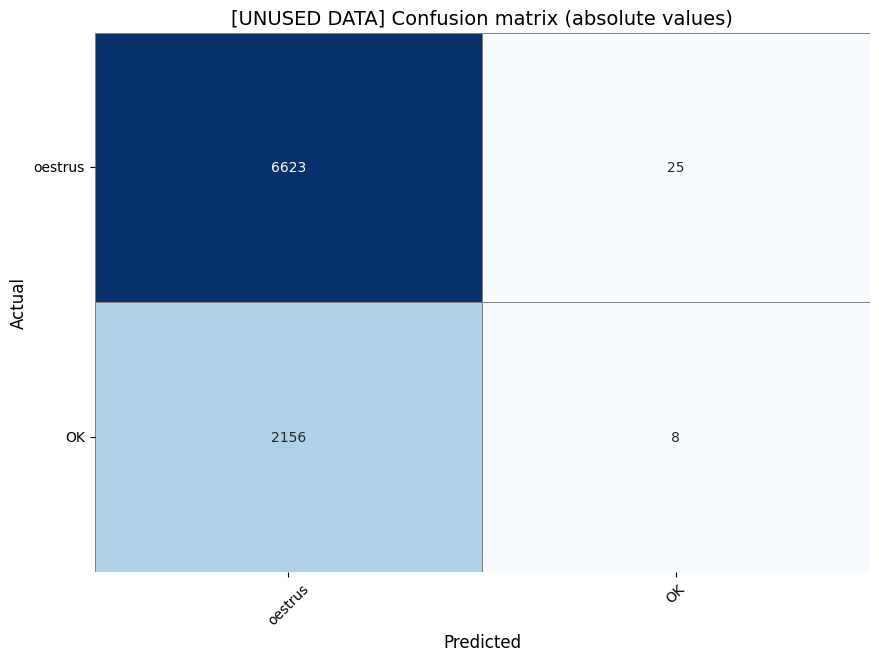


[UNUSED DATA] Confusion matrix (percentages): :


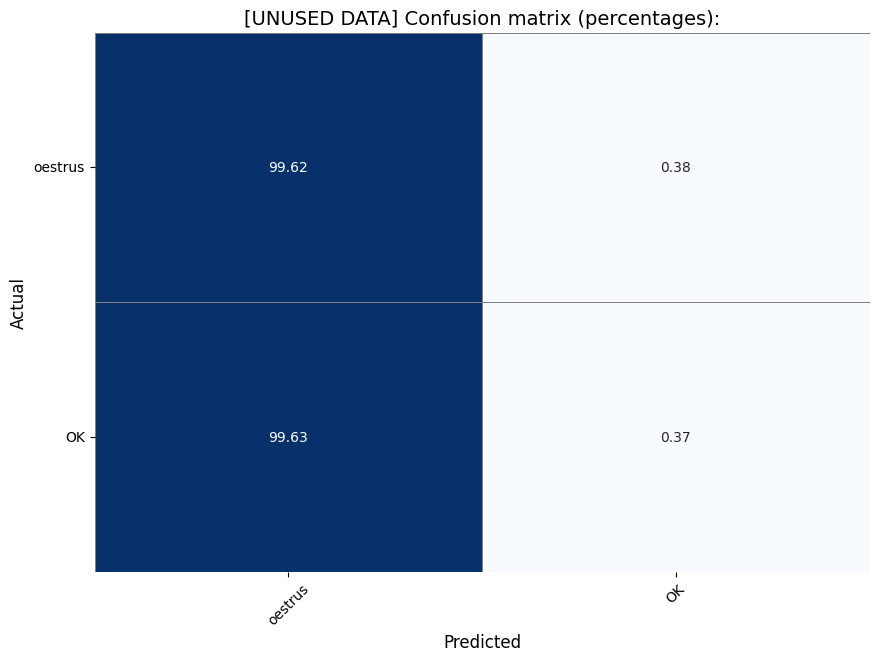


[UNUSED DATA] Detailed performance report by class:
+---------+-------------+------------------------+---------------+------------+-----------+
| Class   |   Precision |   Recall (Sensitivity) |   Specificity |   F1-score |   Support |
|---------+-------------+------------------------+---------------+------------+-----------|
| oestrus |      0.2424 |                 0.0037 |        0.9962 |     0.0073 |      2164 |
| OK      |      0.7544 |                 0.9962 |        0.0037 |     0.8586 |      6648 |
+---------+-------------+------------------------+---------------+------------+-----------+


In [ ]:
# === ÉVALUATION SUR LES DONNÉES NON UTILISÉES ===

# 1. Rechargement des données non utilisées
df_unused = pd.read_csv("unused_balanced_dataset3.csv")

# 2. Création de la colonne 'target'
df_unused['target'] = df_unused[target_cols].idxmax(axis=1)
y_unused = le.transform(df_unused['target'])

# 3. Séparation X et y
X_unused = df_unused.drop(columns=target_cols + ['target'])

# 4. Prédictions sur unused_data
y_unused_pred = best_model.predict(X_unused)

# 5. Inverse des labels pour affichage
y_unused_labels = le.inverse_transform(y_unused)
y_unused_pred_labels = le.inverse_transform(y_unused_pred)

# 6. Matrice de confusion
conf_matrix_unused = confusion_matrix(y_unused_labels, y_unused_pred_labels, labels=target_cols)
conf_matrix_unused_df = pd.DataFrame(conf_matrix_unused, index=target_cols, columns=target_cols)

print("\n[UNUSED DATA] Confusion matrix (absolute values) :")
plot_confusion_matrix(conf_matrix_unused_df, "[UNUSED DATA] Confusion matrix (absolute values)")

conf_matrix_unused_percent = confusion_matrix(y_unused_labels, y_unused_pred_labels,
                                              labels=target_cols, normalize='true') * 100
conf_matrix_unused_percent_df = pd.DataFrame(conf_matrix_unused_percent.round(2),
                                             index=target_cols, columns=target_cols)

print("\n[UNUSED DATA] Confusion matrix (percentages): :")
plot_confusion_matrix(conf_matrix_unused_percent_df, "[UNUSED DATA] Confusion matrix (percentages):", fmt='.2f')

# 7. Rapport de performance sur les données non utilisées
metrics_unused_df = calculate_metrics(y_unused, y_unused_pred, target_cols)

print("\n[UNUSED DATA] Detailed performance report by class:")
print(tabulate(metrics_unused_df, headers='keys', tablefmt='psql',
               showindex=False, floatfmt=".4f"))


**Classification** -- **RF**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    precision_score, recall_score, confusion_matrix
)

# Step 1: Load your dataset
df = pd.read_csv('selected_features_after_augmentation_D3.csv')

# Step 2: Create the 'target' column based on binary columns
def get_target_label(row):
    for label in ['oestrus']:
        if row[label] == 1:
            return label
    return 'ok'

df['target'] = df.apply(get_target_label, axis=1)

# Split 10% for validation
df_remain, df_val = train_test_split(
    df, test_size=0.10, random_state=42, stratify=df['target']
)
df_val.to_csv("validation_10_percent_dataset3_RF.csv", index=False)
df_remain.to_csv("train_test_90_percent_d3_RF.csv", index=False)

# List of selected features
selected_features=['Minimum', 'Maximum', 'RMS', 'Mode', 'Q10', 'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Autocorr1', 'Autocorr2', 'Autocorr6', 'Autocorr5','Autocorr7', 'Autocorr10', 'h1', 'h2', 'h3', 'h4']

X_remain = df_remain[selected_features]
y_remain = df_remain['target']

# Split 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_remain, y_remain, test_size=0.20, random_state=42, stratify=y_remain
)

# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print(" Best parameters found:", grid_search.best_params_)

# Evaluate best model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)
y_predict = best_clf.predict(X_test)

print("\n Classification Report:")
print(classification_report(y_test, y_predict))

# Evaluation metrics
accuracy = accuracy_score(y_test, y_predict)
f1_macro = f1_score(y_test, y_predict, average='macro')
precision_macro = precision_score(y_test, y_predict, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_predict, average='macro', zero_division=0)

labels = best_clf.classes_
cm = confusion_matrix(y_test, y_predict, labels=labels)

# Calculate specificity per class
specificity_per_class = []
for i, label in enumerate(labels):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificity_per_class.append(specificity)

specificity_macro = np.mean(specificity_per_class)

# Print results
print(f"\n Evaluation Metrics:")
print(f"Accuracy           : {accuracy:.4f}")
print(f"F1 Score (Macro)   : {f1_macro:.4f}")
print(f"Precision (Macro)  : {precision_macro:.4f}")
print(f"Recall/Sensitivity : {recall_macro:.4f}")
print(f"Specificity (Macro): {specificity_macro:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

**Classification** -- **XgBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('selected_features_after_augmentation_D3.csv')

# Drop unnecessary columns if present
df.drop(columns=['start_time', 'end_time', 'cow'], errors='ignore', inplace=True)

# Split: 90% for training/validation, 10% set aside
df_train_val, df_unused = train_test_split(df, test_size=0.1, random_state=42)

# Save the 10% unused data to CSV
df_unused.to_csv('unused_D3_XG.csv', index=False)

# 1. Create multi-class target
target_cols = ['oestrus','OK']
df_train_val['target'] = df_train_val[target_cols].idxmax(axis=1)

# 2. Encode labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(df_train_val['target'])

# 3. Split into features and labels
X = df_train_val.drop(columns=target_cols + ['target'])
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define the XGBoost model
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(target_cols),
    eval_metric='mlogloss',
    random_state=42
)

# 5. Hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0]
}

# 6. Grid search for best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

# 7. Train the model
grid_search.fit(X_train, y_train)

# 8. Display best parameters
print("Best hyperparameters found:")
print(grid_search.best_params_)

# 9. Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Decode numerical labels for readability
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title, fmt='d'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt=fmt, cmap='Blues',
                cbar=False, linewidths=0.5, linecolor='gray')
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Confusion matrix (absolute values)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=target_cols)
conf_matrix_df = pd.DataFrame(conf_matrix,
                             index=target_cols,
                             columns=target_cols)

print("\nConfusion matrix (absolute values):")
plot_confusion_matrix(conf_matrix_df, "Confusion Matrix (Absolute Values)")

# Confusion matrix (percentages per row)
conf_matrix_percent = confusion_matrix(y_test_labels, y_pred_labels, labels=target_cols, normalize='true') * 100
conf_matrix_percent_df = pd.DataFrame(conf_matrix_percent.round(2),
                                     index=target_cols,
                                     columns=target_cols)

print("\nConfusion matrix (percentages):")
plot_confusion_matrix(conf_matrix_percent_df, "Confusion Matrix (Percentages)", fmt='.2f')

# Function to calculate specificity per class
def specificity_score(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    specificity_scores = []
    for i in range(len(labels)):
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
        fp = np.sum(np.delete(cm[i, :], i))
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_scores.append(specificity)
    return specificity_scores

# Function to compute all metrics
def calculate_metrics(y_true, y_pred, target_names):
    labels = range(len(target_names))
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    metrics = []
    for i, class_name in enumerate(target_names):
        tp = cm[i, i]
        fp = np.sum(np.delete(cm[:, i], i))
        fn = np.sum(np.delete(cm[i, :], i))
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = np.sum(y_true == i)

        metrics.append({
            'Class': class_name,
            'Precision': precision,
            'Recall (Sensitivity)': recall,
            'Specificity': specificity,
            'F1-score': f1,
            'Support': support
        })

    return pd.DataFrame(metrics)

# Compute and display metrics
metrics_df = calculate_metrics(y_test, y_pred, target_cols)

print("\nDetailed performance report by class:")
print(tabulate(metrics_df, headers='keys', tablefmt='psql',
               showindex=False, floatfmt=".4f"))


Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
# === ÉVALUATION SUR LES DONNÉES NON UTILISÉES ===

# 1. Rechargement des données non utilisées
df_unused = pd.read_csv('unused_D3_XG.csv')

# 2. Création de la colonne 'target'
df_unused['target'] = df_unused[target_cols].idxmax(axis=1)
y_unused = le.transform(df_unused['target'])

# 3. Séparation X et y
X_unused = df_unused.drop(columns=target_cols + ['target'])

# 4. Prédictions sur unused_data
y_unused_pred = best_model.predict(X_unused)

# 5. Inverse des labels pour affichage
y_unused_labels = le.inverse_transform(y_unused)
y_unused_pred_labels = le.inverse_transform(y_unused_pred)

# 6. Matrice de confusion
conf_matrix_unused = confusion_matrix(y_unused_labels, y_unused_pred_labels, labels=target_cols)
conf_matrix_unused_df = pd.DataFrame(conf_matrix_unused, index=target_cols, columns=target_cols)

print("\n[UNUSED DATA] Confusion matrix (absolute values) :")
plot_confusion_matrix(conf_matrix_unused_df, "[UNUSED DATA] Confusion matrix (absolute values)")

conf_matrix_unused_percent = confusion_matrix(y_unused_labels, y_unused_pred_labels,
                                              labels=target_cols, normalize='true') * 100
conf_matrix_unused_percent_df = pd.DataFrame(conf_matrix_unused_percent.round(2),
                                             index=target_cols, columns=target_cols)

print("\n[UNUSED DATA] Confusion matrix (percentages): :")
plot_confusion_matrix(conf_matrix_unused_percent_df, "[UNUSED DATA] Confusion matrix (percentages):", fmt='.2f')

# 7. Rapport de performance sur les données non utilisées
metrics_unused_df = calculate_metrics(y_unused, y_unused_pred, target_cols)

print("\n[UNUSED DATA] Detailed performance report by class:")
print(tabulate(metrics_unused_df, headers='keys', tablefmt='psql',
               showindex=False, floatfmt=".4f"))


**Classification** -- **Bi-LSTM**